Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION  (CHEN ZIGENG A0260093L)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random

def generate_sin():
    x = np.arange(0,1.05,0.05)
    y = np.sin((np.power(x,2)+1))
    return x,y

def generate_poly():
    x = np.arange(0,9,0.5)
    y = 0.4345*np.power(x,3)-5.607*np.power(x,2)+16.78*x-10.61
    return x,y

def addnoise(y_curve, mu, sigma):
    noise = np.random.normal(mu,sigma,len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def nummpy_poly_fit(x,y,M):
    z = np.polyfit(x,y,M)
    f = np.poly1d(z)
    return f

def Gaussian_basis(x,mu,s):
    res = np.exp(-(x-mu)**2/(2*(s**2)))
    return res

def full_bayesian_fitting(x,y,M,s,alpha,beta):
    N = len(x)
    mx = np.zeros((N,M+1))
    vy = np.zeros((N,1))
    I = np.identity(M+1)

    for n in range(0,N):
        vy[n][0] = y[n]
        for m in range(0,M+1):
            if m == 0:
                mx[n][m] = 1
            else:
                mx[n][m] = Gaussian_basis(x[n],m/(M+1),s)

    SSn = linalg.pinv(alpha*I + beta*np.dot(mx.T,mx))
    w = np.dot(SSn,mx.T)
    w = beta*np.dot(w,vy)
    return w,SSn

def full_bayesian_paint(x,w,s):
    n = len(x)
    mx = np.zeros([n, len(w)])
    for i in range(n):
        for j in range(0, len(w)):
            if j == 0:
                mx[i][j] = 1
            else:
                mx[i][j] = Gaussian_basis(x[i],j/len(w),s)
    y_new = np.dot(mx, w)
    return y_new

1.Generate 50 2D-data points using the following function: . Add Gaussian random noise to the data. Show the original curve line and the noisy data.

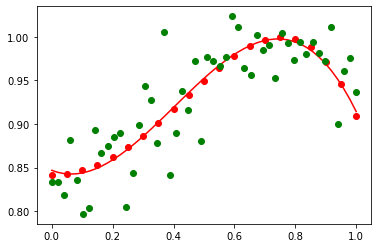

In [2]:
#generate True data
x_true,y_true = generate_sin()

#fit on the actual data
f = nummpy_poly_fit(x_true, y_true, 3)
x_curve = np.linspace(x_true[0],x_true[-1],50)
y_curve = f(x_curve)

#add noise on the True data
y_noise = addnoise(y_curve,0,0.035)
x_noise = x_curve

plt.figure()
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.show()

2. Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.

In [3]:
m = 8
s = 0.25
alpha = 0.2
beta = 5
w,SSn = full_bayesian_fitting(x_noise,y_noise,m,s,alpha,beta)
y_predict = full_bayesian_paint(x_noise,w,s)
print("Estimated w:",w)

Estimated w: [[ 0.70567215]
 [ 0.10276623]
 [-0.00784215]
 [ 0.00289644]
 [ 0.06449542]
 [ 0.06647757]
 [ 0.01379188]
 [ 0.03069756]
 [ 0.19237707]]


3. Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

Answer:Alpha is the variance of prior p(w) and beta is the variance of likelihood p(t|w). Alpha and beta effect the p(w|t) and p(t). In practice, a large alpha and a small beta may lead to underfitting, a small alpha and a large beta may lead to overfitting. Only proper Alpha and beta can make the curve fitting work well.

4. Show your best fitting

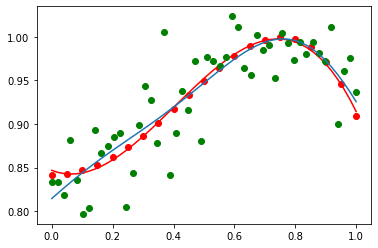

In [4]:
plt.figure()
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_noise,y_predict)
plt.show()

5. Explain how useful p(w|t) for the training and testing stages.

Answer: In the training stage, p(w|t) helps to predict values of w. In the testing stage, p(w|t) helps to compare two or more prediction results. We will choose or be more confident to use the predicted result with the highest probability or certainty.

6. Generate 50 2D-data points using the following function: . Add Gaussian random noise to the data. Show the original curve line and the noisy data

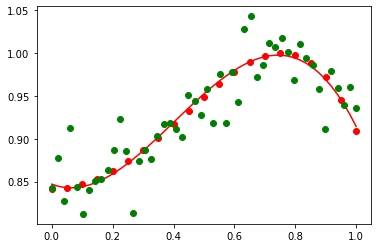

In [5]:
#generate True data
x_true,y_true = generate_sin()

#fit on the actual data
f = nummpy_poly_fit(x_true, y_true, 3)
x_curve = np.linspace(x_true[0],x_true[-1],50)
y_curve = f(x_curve)

#add noise on the True data
y_noise = addnoise(y_curve,0,0.025)
x_noise = x_curve

plt.figure()
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.show()

7. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one:

0 [34]


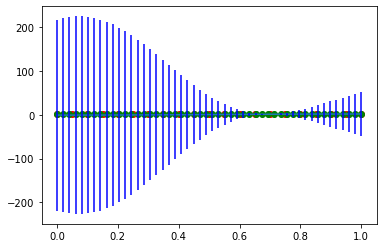

1 [34, 21]


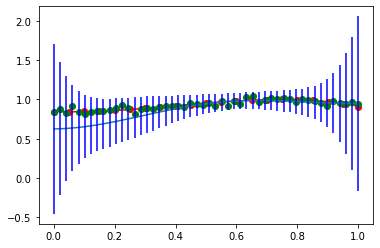

2 [34, 21, 10]


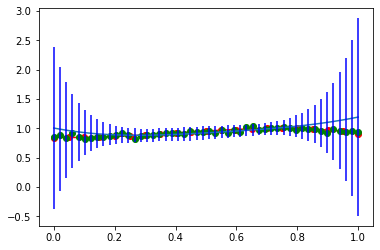

3 [34, 21, 10, 48]


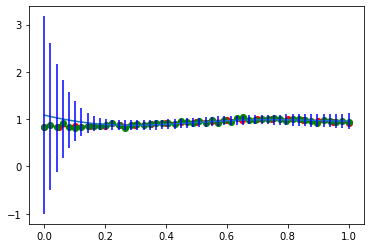

4 [34, 21, 10, 48, 30]


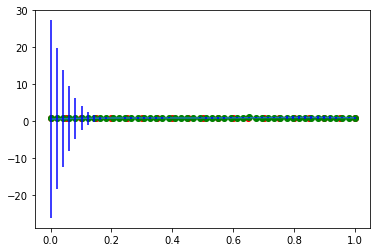

5 [34, 21, 10, 48, 30, 45]


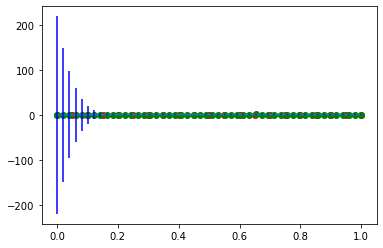

6 [34, 21, 10, 48, 30, 45, 0]


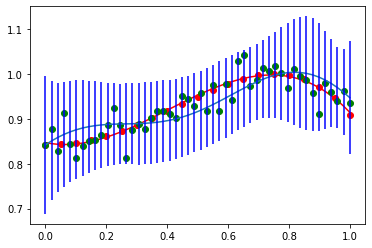

7 [34, 21, 10, 48, 30, 45, 0, 5]


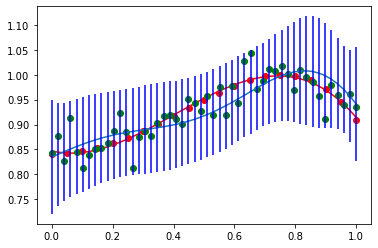

8 [34, 21, 10, 48, 30, 45, 0, 5, 25]


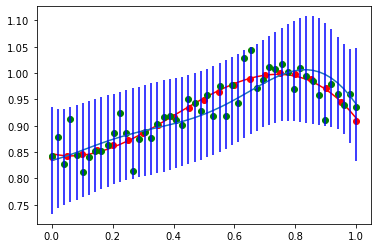

9 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13]


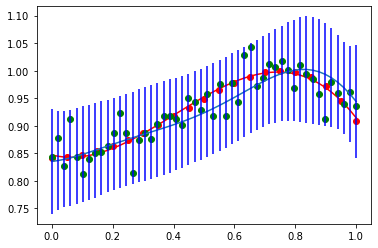

10 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16]


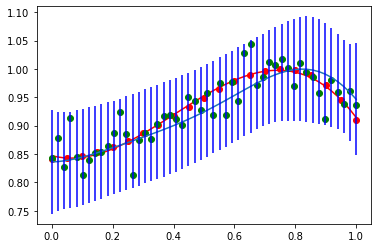

11 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33]


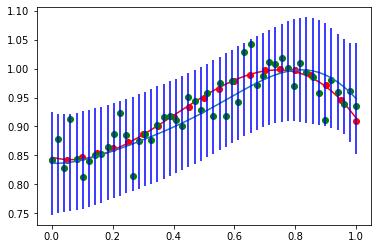

12 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31]


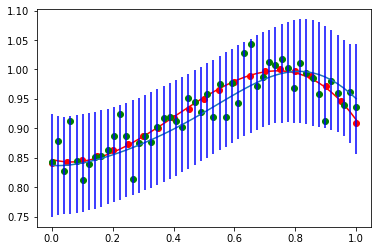

13 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27]


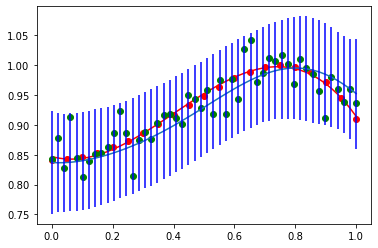

14 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7]


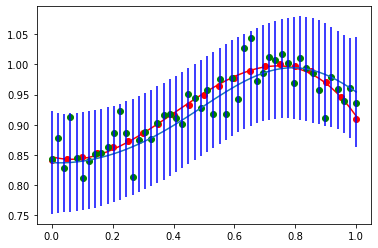

15 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23]


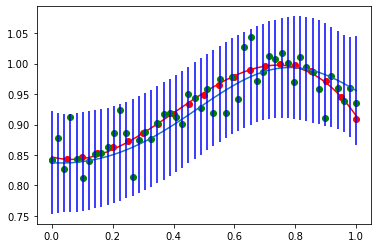

16 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26]


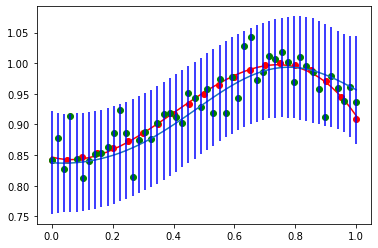

17 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17]


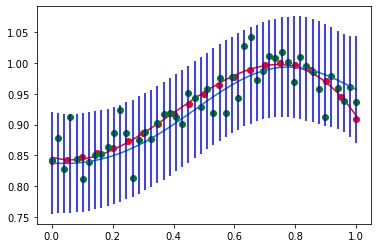

18 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41]


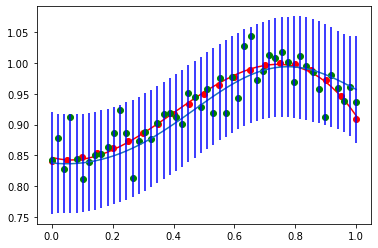

19 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20]


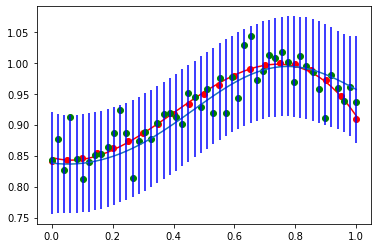

20 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4]


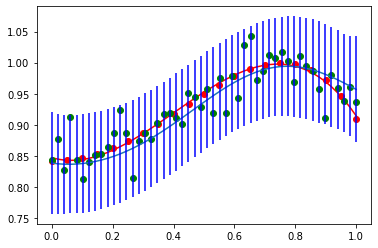

21 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15]


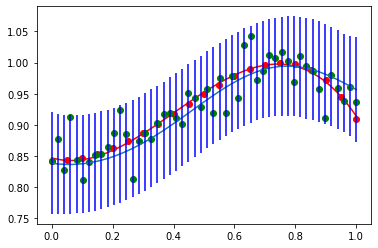

22 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40]


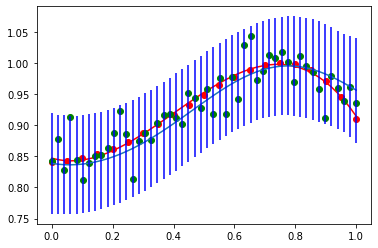

23 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39]


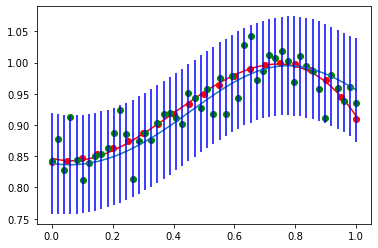

24 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18]


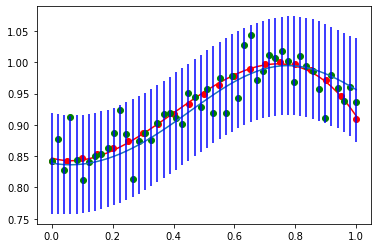

25 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44]


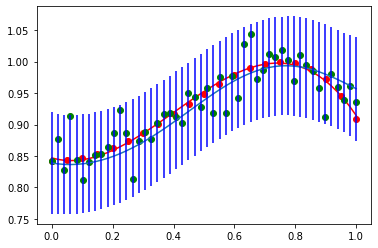

26 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29]


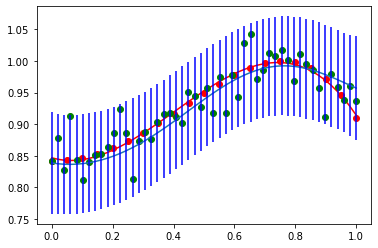

27 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43]


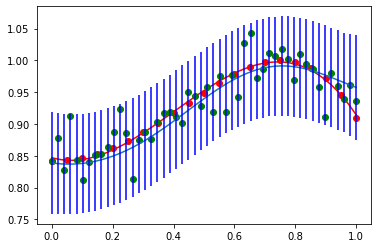

28 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12]


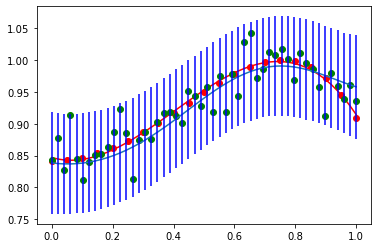

29 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14]


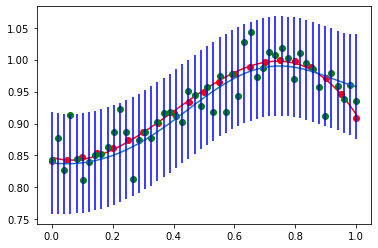

30 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1]


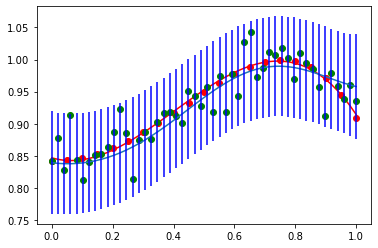

31 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28]


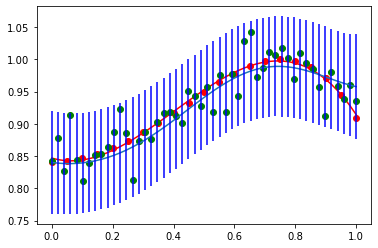

32 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24]


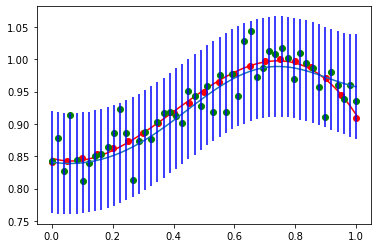

33 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47]


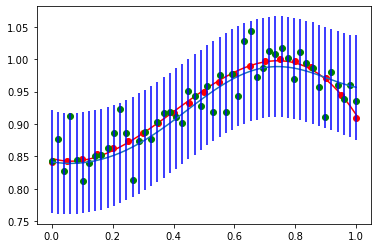

34 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32]


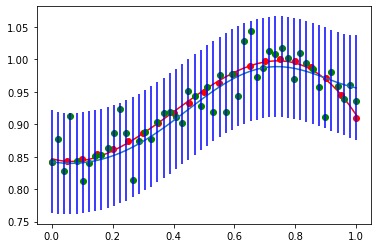

35 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6]


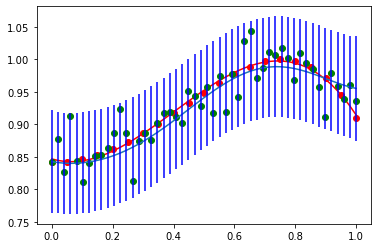

36 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8]


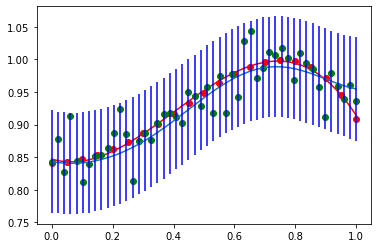

37 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37]


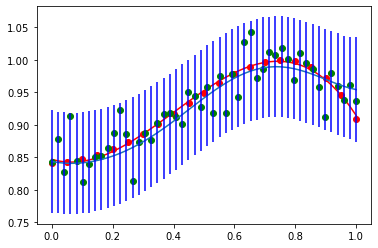

38 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35]


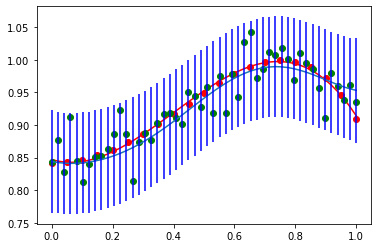

39 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49]


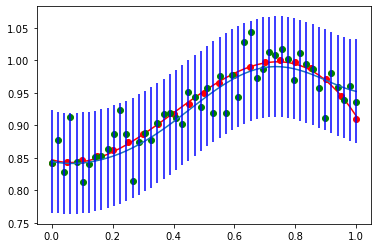

40 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38]


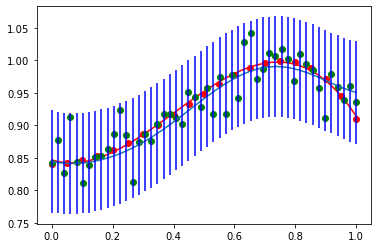

41 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22]


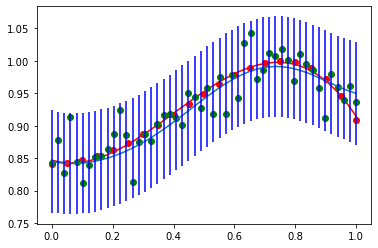

42 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42]


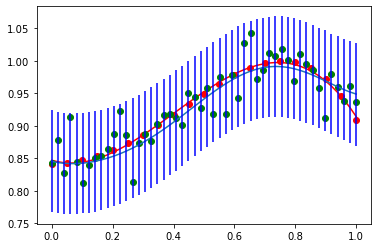

43 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42, 19]


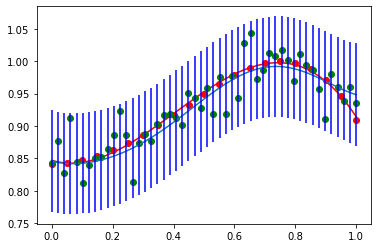

44 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42, 19, 3]


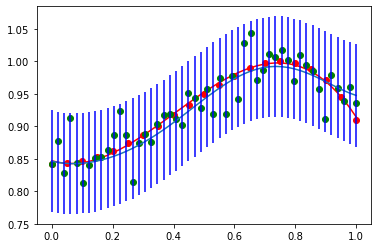

45 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42, 19, 3, 9]


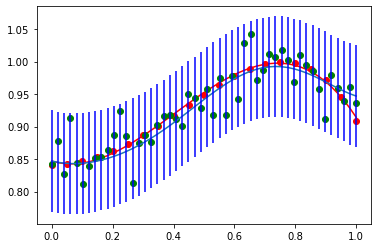

46 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42, 19, 3, 9, 46]


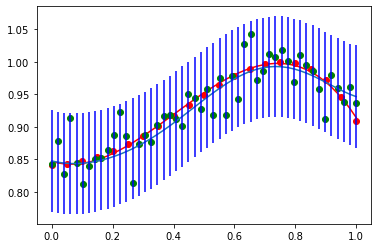

47 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42, 19, 3, 9, 46, 2]


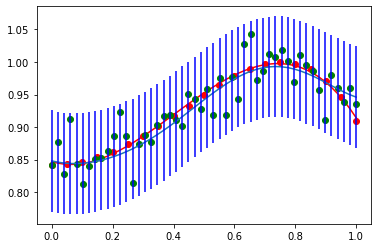

48 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42, 19, 3, 9, 46, 2, 11]


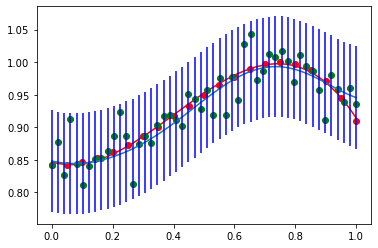

49 [34, 21, 10, 48, 30, 45, 0, 5, 25, 13, 16, 33, 31, 27, 7, 23, 26, 17, 41, 20, 4, 15, 40, 39, 18, 44, 29, 43, 12, 14, 1, 28, 24, 47, 32, 6, 8, 37, 35, 49, 38, 22, 42, 19, 3, 9, 46, 2, 11, 36]


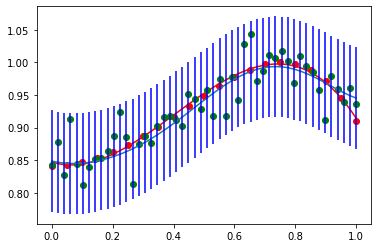

In [6]:
index =[i for i in range(0,50)]
x_index = []
random.shuffle(index)

alpha = 0.01
beta = 13
s = 0.5
SSoldi = SSnewi = alpha
wnew = wold = 0
M = 6

N = len(x_noise)
mxt = np.zeros((N, M + 1))
vy = np.zeros((N, 1))
I = np.identity(M + 1)

for n in range(0, N):
    vy[n][0] = y_noise[n]
    for m in range(0, M + 1):
        if m == 0:
            mxt[n][m] = 1
        else:
            mxt[n][m] = Gaussian_basis(x_noise[n], m/(M+1), s)


xn = np.array([])
yn = np.array([])
for i in range(50):
    SSoldi = SSnewi
    wold = wnew
    num = index[i]
    x_index.append(num)
    xn = np.append(xn,[x_noise[num]])
    yn = np.append(yn,[y_noise[num]])

    N = len(xn)
    mx = np.zeros((N,M+1))
    vy = np.zeros((N,1))
    I = np.identity(M+1)

    for n in range(0,N):
        vy[n][0] = yn[n]
        for m in range(0,M+1):
            if m == 0:
                mx[n][m] = 1
            else:
                mx[n][m] = Gaussian_basis(xn[n],m/(M+1),s)

    SSnewi = SSoldi + beta*np.dot(mx.T,mx)
    SSnew = linalg.pinv(SSnewi)
    wnew = (np.dot(SSoldi,wold) + beta*np.dot(mx.T,vy))
    wnew = np.dot(SSnew,wnew)

    m_star = np.dot(wnew.T,mxt.T)
    s_star = np.zeros([50,1])
    for p in range(len(s_star)):

        s_star[p] = (1/beta)+np.dot(np.dot(mxt[p],SSnew),mxt[p].T)
    #s_star = (1/beta)+np.dot(np.dot(mxt,SSnew),mxt.T)
    #print(s_star)
    plt.figure(i)
    plt.plot(x_true, y_true, 'ro')
    plt.plot(x_curve, y_curve, "red")
    plt.plot(x_noise, y_noise, "go")
    plt.plot(x_noise,m_star.T)
    plt.vlines(x_noise,m_star.T - (s_star),m_star.T + (s_star),linestyles="solid",colors="b")
    print(i,x_index)
    plt.show()

8. Explain why the predictive distribution is better than the original form of the full Bayesian inference.

Answer: Using the predictive distribution, we can know the probability of all possible prices, and we can know the most probable price as well. But the original form of the full Bayesian inference can only tell us the most probable price.

9. Discuss the differences between p(t_new|t) and p(w|t).

Answer: p(t_new|t) tell us the probability of all possible tnew and the most probable tnew. p(w|t) tell us the probability of w given t and help us to predict w. Basic idea of p(t_new|t) is that we need to find the correlation between tnew and t. The correlation between tnew and t can be obtained through w. Therefore we can marginalize over w to get p(t_new|t).